<a href="https://colab.research.google.com/github/teja1091/objectdet/blob/main/object_det%20output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics -q
!pip install pyyaml -q

from ultralytics import YOLO
import yaml
import cv2
from google.colab.patches import cv2_imshow

model = YOLO("yolov8n.pt")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 22.0 MB/s eta 0:00:00


100%|██████████| 6.25M/6.25M [00:00<00:00, 78.0MB/s]


In [2]:
model.predict("/content/sample_data/mind.jpeg", save=True, save_txt=True)


image 1/1 /content/sample_data/mind.jpeg: 640x448 3 broccolis, 2 carrots, 423.2ms
Speed: 28.2ms preprocess, 423.2ms inference, 28.7ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [3]:
names = {
    22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag',
    27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard',
    32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove',
    36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle',
    40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'tomato', 45: 'bowl',
    46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli',
    51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair',
    57: 'man', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet',
    62: 'tv', 63: 'laptop', 64: 'car', 65: 'remote', 66: 'keyboard',
    67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink',
    72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors',
    77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'
}

In [4]:
with open("/content/runs/detect/predict/labels/mind.txt", "r") as stream:
    lis = stream.readlines()

# Process predictions, handling potential KeyErrors
for l in lis:
    ind = int(l.split()[0])
    try:
        print(ind, names[ind])
    except KeyError:
        print(f"Warning: Class index {ind} not found in the 'names' dictionary.")


51 carrot
51 carrot
50 broccoli
50 broccoli
50 broccoli


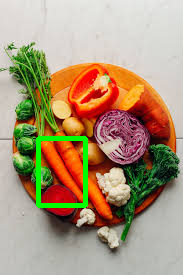

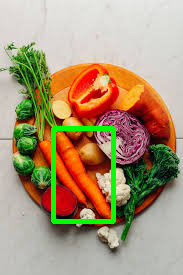

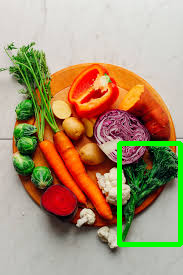

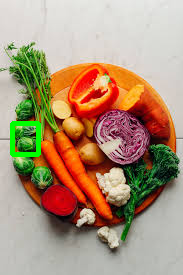

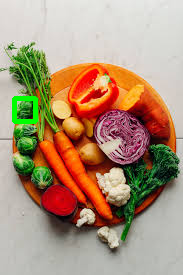

In [5]:
for l in lis:
    li = l.split()
    xc, yc, nw, nh = float(li[1]), float(li[2]), float(li[3]), float(li[4])
    img = cv2.imread("/content/sample_data/mind.jpeg")
    h, w = img.shape[0], img.shape[1]
    xc *= w
    yc *= h
    nw *= w
    nh *= h
    top_left = (int(xc - nw/2), int(yc - nh/2))
    bot_right = (int(xc + nw/2), int(yc + nh/2))
    img = cv2.rectangle(img, top_left, bot_right, (0, 255, 0), 3)
    cv2_imshow(img)